# Análisis de Componentes Principales

## Planteamiento[^1]
Se aplica a tablas de datos donde las filas son considerados como individuos y las columnas como datos cuantitativos. 

Más formalmente, se dispone de los valores de $p$ variables y $n$ elementos dispuestos en una matriz $\mathbf{X}$ de dimensión $n\times p$. 

Siempre (casi) se usa la matriz centrada y/o estandarizada, los paquetes suelen hacer este trabajo por nosostros. Supongamos que  $\mathbf{X}$ ha sido centrada, su matriz de varianza covarianza viene dada por  $\frac{1}{n}\mathbf{X'X}$.

¿Cómo encontrar un espacio de dimensión más reducida que represente adeucadamente los datos? 

### Notación

Se desea encontrar un subespacio de dimensión menor que $p$ tal que al proyectar sobre él los puntos conserven su estructura con la menor distorsión posible.

Consideremos primero un subespacio de dimensión uno (una recta) obtenida por un conjunto de $p=2$ variables.

La siguiente figura indica el diagrama de dispersión y una recta que, intuitivamente, proporciona un buen resumen de los datos, ya que las proyecciones de los puntos sobre ella indican aproximadamente la situación de los puntos en el plano.

<img src="images/fig1.png" width="700" height="300">

Si consideramos un punto $\mathbf{x_i}$ y una dirección $\mathbf{a_1} = (a_{11}, \ldots, a_{1p})'$, definida por un vector $\mathbf{a_1}$ de norma unidad, la proyección del punto $\mathbf{x_i}$ sobre esta dirección es el escalar:

$$
z_i= a_{11}x_{i1}+\ldots+a_{1p}x_{ip} = \mathbf{a_1^{'}x_i}
$$

y el vector que representa esta proyección será $z_i\mathbf{a_1}$. Llamando $r_i$ a la distancia entre el punto $x_i$, y su proyección sobre la dirección $\mathbf{a_1}$, este criterio implica:

$$
min\sum_{i = 1}^{n} r^2_i = \sum_{i = 1}^{n} |\mathbf{x_i}-z_i\mathbf{a_1}|^2
$$

donde $|\cdot|$ es la norma euclideana o módulo del vector.



Notemos que al proyectar cada punto sobre la recta se forma un triángulo rectángulo donde la hipotenusa es la distancia al origen del punto al origen, $(\mathbf{x_i'x_i})^{1/2}$, y los catetos la proyeccion del punto sobre la recta $(z_i)$ y la distancia entre el punto y su proyección $(r_i)$. Por el teorema de Pitágoras, podemos escribir:

$$
(\mathbf{x_i'x_i}) = z_i^2+r_i^2
$$

y sumando esta expresión para todos los puntos, se obtiene:

$$
\sum_{i=1}^{n}(\mathbf{x_i'x_i}) = \sum_{i=1}^{n}z_i^2+\sum_{i=1}^{n}r_i^2
$$


Como el primer miembro es constante, minimizar $\sum_{i=1}^{n}r_i^2$, la suma de las distancias a la recta de todos los puntos, es equivalente a maximizar $\sum_{i=1}^{n}z_i^2$, la suma al cuadrado de los valores de las proyecciones. Como las proyecciones $z_i$ son variables de media cero, **maximizar la suma de sus cuadrados equivale a mazimizar su varianza**.


*¿Cómo es eso posible?*

### Cálculo del primer componente

El primer componente principal será la combinación lineal de las variables originales que tenga varianza máxima. Los valores de este primer componente en los $n$ individuos se representarán por un vector $\mathbf{z_1}$, dado por

$$
\mathbf{z_1} = \mathbf{Xa_1}
$$

Como las variables originales tienen media cero también $\mathbf{z_1}$ tendrá media nula. Su varianza será:

$$
Var(\mathbf{z_1}) = \frac{1}{n}\mathbf{z_1^{'}z_1} = \frac{1}{n}\mathbf{a_1^{'}X'Xa_1} = \mathbf{a_1^{'}Sa_1}
$$

donde $S$ es la matriz de varianzas y covarianzas de las observaciones. Para que la maximización de la ecuación anterior tenga solución debemos imponer una restricción al módulo del vector $\mathbf{a_1}$, y, sin pérdida de generalidad, impondremos que $\mathbf{a_1^{'}a_1}=1$. Usamos para ello el multiplicador de Lagrange


$$
M = \mathbf{a_1^{'}Sa_1}- \lambda(\mathbf{a_1^{'}a_1}-1)
$$

Se maximiza derivando respecto a los componentes de $\mathbf{a_1}$ e igualando a cero. Entonces

$$
\frac{\partial M}{\partial\mathbf{a_1}} = 2\mathbf{Sa_1}-2\lambda\mathbf{a_1} = 0
$$


cuya solución es:

$$
\mathbf{Sa_1} = \lambda\mathbf{a_1}
$$


que implica que $\mathbf{a1}$ es un vector propio de la matriz $\mathbf{S}$, y $\lambda$ su correspondiente valor propio. Para determinar qué valor propio de $\mathbf{S}$ es la solución de la ecuación tendremos en cuenta que, multiplicando por la izquierda por $\mathbf{a'_{1}}$ esta ecuación,


$$
 \mathbf{a_1^{'}Sa_1} =  \lambda \mathbf{a_1^{'}a_1} = \lambda
$$


y concluimos, que $\lambda$ es la varianza de $\mathbf{z_1}$. Como esta es la cantidad que queremos maximizar, $\lambda$ será el mayor valor propio de la matriz $\mathbf{S}$. Su vector asociado, $\mathbf{a1}$, define los coeficientes de cada variable en el primer componente principal.


[^1]: Teoría  obtenida de Peña, D. *Análisis de datos multivariantes* (2002). Referencias de `FactoMineR` vienen de Husson, F. *Exploratory multivariate analysis by example using R* (2017)

**Ejemplo**


El siguiente conjunto de datos corresponde a calificaciones de 20 estudiantes en 5 materias Ciencias Natuales (CNa), Matemáticas (Mat), Francés (Fra), Latín (Lat) y Literatura (Lit)

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

CNa = [7,5,5,6,7,4,5,5,6,6,6,5,6,8,6,4,6,6,6,7]
Mat = [7,5,6,8,6,4,5,6,5,5,7,5,6,7,7,3,4,6,5,7]
Fra = [5,6,5,5,6,6,5,5,7,6,5,4,6,8,5,4,7,7,4,6]
Lat = [5,6,7,6,7,7,5,5,6,6,6,5,6,8,6,4,8,7,4,7]
Lit = [6,5,5,6,6,6,6,5,6,6,5,4,5,8,6,4,7,7,4,6]
Notas = pd.DataFrame({'CNa':CNa,'Mat':Mat,'Fra':Fra,'Lat':Lat,'Lit':Lit})
Notas

,CNa,Mat,Fra,Lat,Lit
0,7,7,5,5,6
1,5,5,6,6,5
2,5,6,5,7,5
3,6,8,5,6,6
4,7,6,6,7,6
5,4,4,6,7,6
6,5,5,5,5,6
7,5,6,5,5,5
8,6,5,7,6,6
9,6,5,6,6,6


Es pertiente empezar por un análisis explotario para tener una mejor perspectiva de los datos:

In [2]:
Notas.describe()

,CNa,Mat,Fra,Lat,Lit
count,20.000000,20.000000,20.000000,20.000000,20.00000
mean,5.800000,5.700000,5.600000,6.050000,5.65000
std,1.005249,1.260743,1.095445,1.145931,1.03999
min,4.000000,3.000000,4.000000,4.000000,4.00000
25%,5.000000,5.000000,5.000000,5.000000,5.00000
50%,6.000000,6.000000,5.500000,6.000000,6.00000
75%,6.000000,7.000000,6.000000,7.000000,6.00000
max,8.000000,8.000000,8.000000,8.000000,8.00000


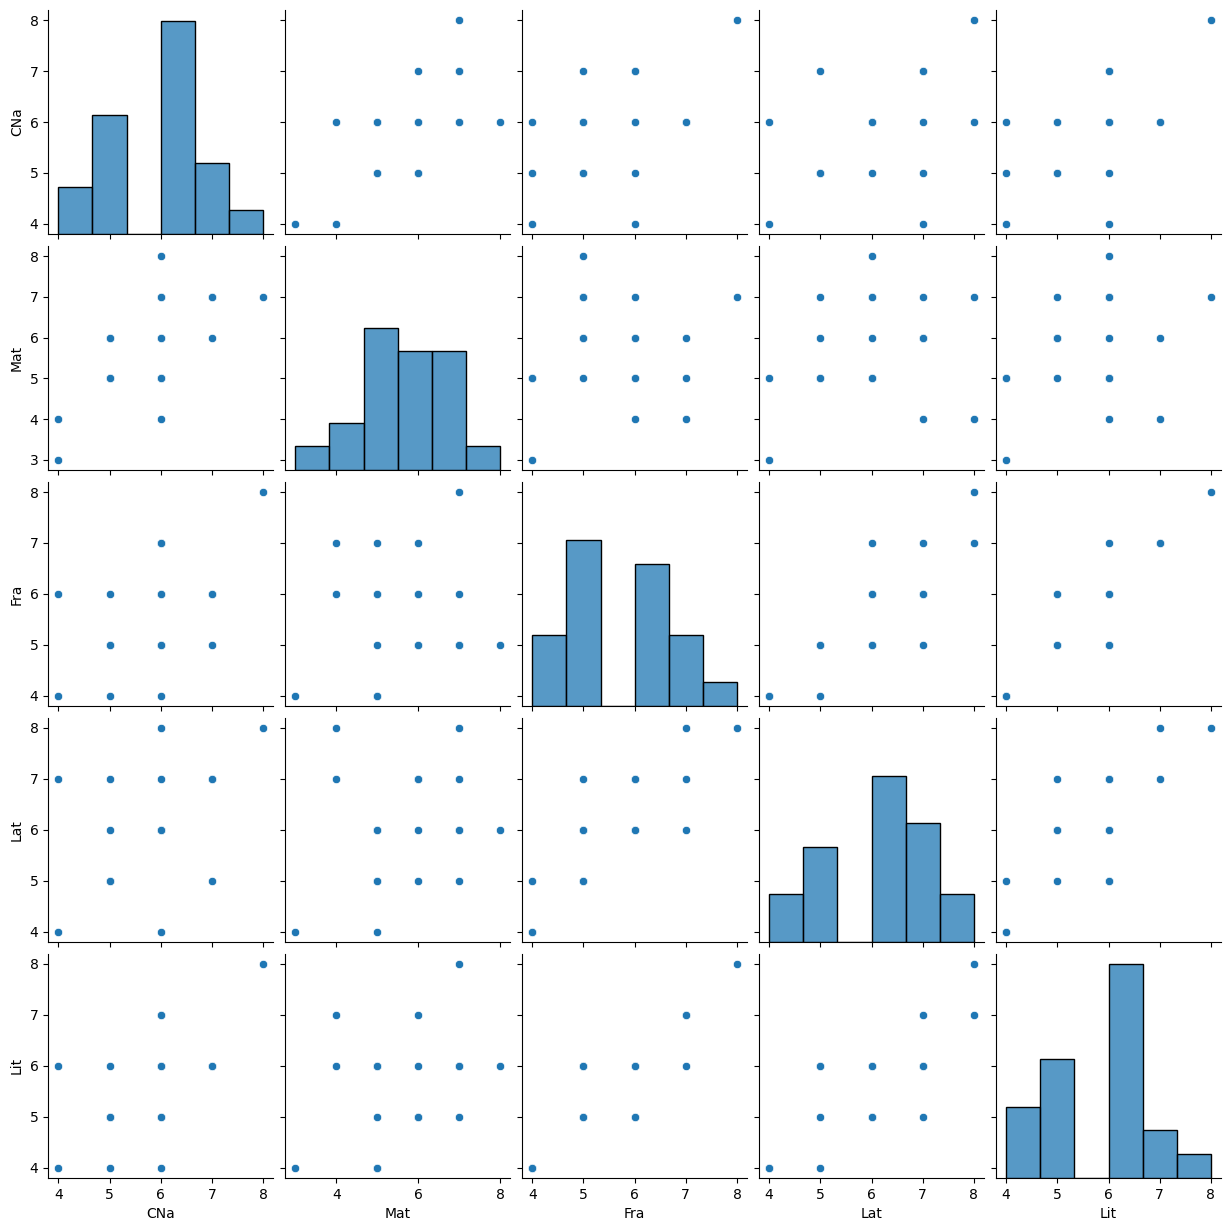

In [3]:
sns.pairplot(Notas)

Como habíamos visto, los valores propios corresponden la varianzas explicadas de cada componente y los vectores propios son sus direcciones o pesos (*loadings*). Es decir:

In [4]:
print(np.corrcoef(Notas.T))

[[1.         0.6561498  0.49706742 0.42034118 0.58398469]
 [0.6561498  1.         0.09908375 0.2295101  0.31711567]
 [0.49706742 0.09908375 1.         0.81339038 0.84081035]
 [0.42034118 0.2295101  0.81339038 1.         0.76622848]
 [0.58398469 0.31711567 0.84081035 0.76622848 1.        ]]


In [5]:
def fc (x):
    val = x-np.mean(x)
    return(val)


Notasc = Notas.apply(fc)

from numpy import linalg as LA
from sklearn.decomposition import PCA
from IPython.display import display

S = np.cov(Notas.T) # Matriz de covarianza
e_values, e_vectors = LA.eig(S) # valores y vectores propios

print(e_values)
print(e_vectors)

[3.77855877 1.66135364 0.40960181 0.22023537 0.12498724]
[[-0.39534516 -0.33102922 -0.66155123  0.47595392  0.26446114]
 [-0.34882879 -0.79772358  0.37084614 -0.17998543 -0.2683914 ]
 [-0.48225721  0.37154122 -0.21520882 -0.01712248 -0.76339838]
 [-0.50400573  0.29871462  0.59983776  0.46491466  0.28424781]
 [-0.48520809  0.16365646 -0.13675863 -0.72431643  0.44096764]]


Ahora podemos calcular los puntajes de los componetes por individuo:

In [6]:
np.matmul(Notasc,e_vectors) #scores

,0,1,2,3,4
0,-0.279154,-1.913571,-0.860331,-0.394234,0.282362
1,0.708139,0.850534,0.242466,0.185938,-0.629896
2,0.337562,-0.020016,1.428359,0.487989,0.149359
3,-0.736643,-2.081551,0.771904,-0.585259,0.033757
4,-1.420594,-0.146877,-0.246711,0.698458,0.355851
5,0.463099,2.441658,0.996251,-0.369433,0.099250
6,1.209194,0.343935,-0.278921,-0.986171,0.290223
7,1.345573,-0.617445,0.228684,-0.441840,-0.419136
8,-0.654672,1.054702,-0.771052,-0.079547,-0.687865
9,-0.172414,0.683161,-0.555843,-0.062425,0.075533


El porcentaje de la varianza explicada por cada componente es:

In [7]:
(e_values/np.sum(e_values))

array([0.60996276, 0.26818793, 0.06612094, 0.03555201, 0.02017636])

Verifiquemos nuestros resultados usando `python`

In [8]:
pcaMod = PCA(n_components=5).fit(Notas)


pcaMod.explained_variance_ratio_

array([0.60996276, 0.26818793, 0.06612094, 0.03555201, 0.02017636])

In [9]:
pcaMod.components_ # Loadings

array([[ 0.39534516,  0.34882879,  0.48225721,  0.50400573,  0.48520809],
       [-0.33102922, -0.79772358,  0.37154122,  0.29871462,  0.16365646],
       [-0.66155123,  0.37084614, -0.21520882,  0.59983776, -0.13675863],
       [-0.47595392,  0.17998543,  0.01712248, -0.46491466,  0.72431643],
       [-0.26446114,  0.2683914 ,  0.76339838, -0.28424781, -0.44096764]])

In [10]:
scores = pcaMod.transform(Notas) # scores
scores

array([[ 0.27915411, -1.91357104, -0.86033137,  0.39423402, -0.28236204],
       [-0.70813894,  0.85053394,  0.24246638, -0.18593762,  0.62989564],
       [-0.33756163, -0.02001625,  1.42835911, -0.48798933, -0.14935915],
       [ 0.73664347, -2.08155078,  0.77190377,  0.5852587 , -0.03375732],
       [ 1.42059398, -0.146877  , -0.24671081, -0.69845826, -0.35585069],
       [-0.46309908,  2.44165783,  0.9962506 ,  0.36943263, -0.09925008],
       [-1.20919379,  0.34393456, -0.27892119,  0.98617099, -0.29022257],
       [-1.34557309, -0.61744548,  0.22868359,  0.44183999,  0.41913648],
       [ 0.65467152,  1.05470241, -0.77105231,  0.07954737,  0.68786524],
       [ 0.17241431,  0.68316118, -0.55584349,  0.06242489, -0.07553314],
       [-0.09739341, -1.44748367,  0.53781626, -0.31904316,  0.13881893],
       [-2.66186718, -0.35491959,  0.2098049 , -0.47958435, -0.17168566],
       [ 0.03603501, -0.27821886, -0.04823871, -0.48190611,  0.6338259 ],
       [ 4.60370426,  0.09348019, -0.6

In [11]:
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(list(zip(a, b, c)), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary



sumpca = pca_summary(pcaMod, Notas)

Importance of components:


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,1.894632,0.609963,0.609963
PC2,1.256299,0.268188,0.878151
PC3,0.623796,0.066121,0.944272
PC4,0.457410,0.035552,0.979824
PC5,0.344584,0.020176,1.000000


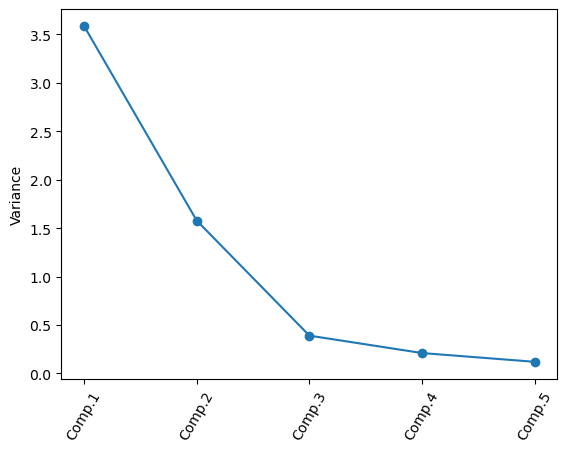

In [12]:
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

screeplot(pcaMod, Notas)

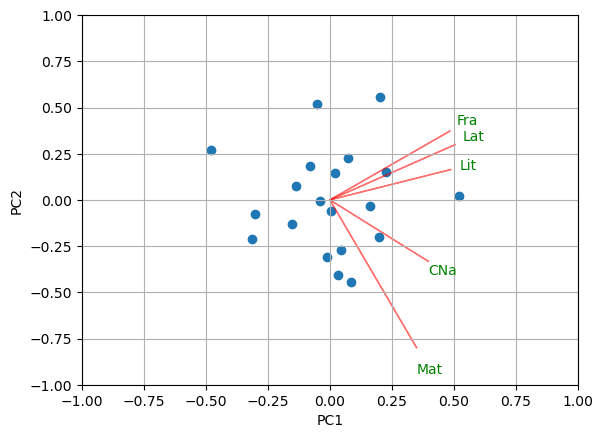

In [13]:
def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()




biplot(scores[:,0:2],np.transpose(pcaMod.components_[0:2, :]),labels = Notas.columns)
